# Data Extraction
For each of the articles, given in the input.xlsx file, extract the article text and save the extracted article in a text file with URL_ID as its file name.

In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from itertools import chain
import os

In [44]:
df = pd.read_excel("/content/Input.xlsx")
df.head()

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...


## Exploring the data

In [45]:
len(df)

114

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URL_ID  114 non-null    float64
 1   URL     114 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [47]:
print(f"{df['URL'][0]}")

https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/


In [48]:
df['URL']

0      https://insights.blackcoffer.com/rise-of-telem...
1      https://insights.blackcoffer.com/rise-of-e-hea...
2      https://insights.blackcoffer.com/rise-of-e-hea...
3      https://insights.blackcoffer.com/rise-of-telem...
4      https://insights.blackcoffer.com/rise-of-telem...
                             ...                        
109    https://insights.blackcoffer.com/coronavirus-i...
110    https://insights.blackcoffer.com/coronavirus-i...
111    https://insights.blackcoffer.com/what-are-the-...
112    https://insights.blackcoffer.com/marketing-dri...
113    https://insights.blackcoffer.com/continued-dem...
Name: URL, Length: 114, dtype: object

## Getting the data from the URL

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>Rise of telemedicine and its Impact on Livelihood by 2040 - Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v21.1 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<meta name="description" content="Telemedicine also has the potential to reduce healthcare costs. Can reduce the need for expensive hospital visits, that it can improve the patient experience" />\n\t<link rel="canonical" href="https://insights.blackco
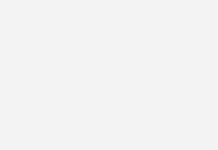
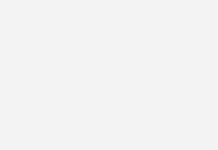
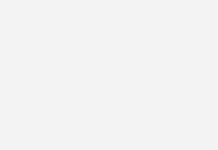
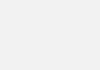
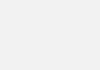
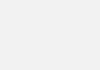
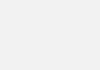
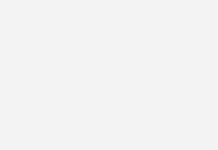
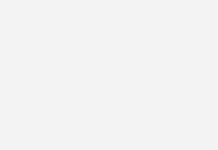
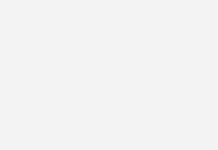
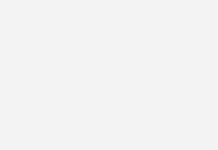

In [49]:
page = requests.get(df['URL'][0])
page.content

In [50]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
<title>Rise of telemedicine and its Impact on Livelihood by 2040 - Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<!-- This site is optimized with the Yoast SEO plugin v21.1 - https://yoast.com/wordpress/plugins/seo/ -->
<meta content="Telemedicine also has the potential to reduce healthcare costs. Can reduce the need for expensive hospital visits, that it can improve the patient experience" name="description"/>
<link href="https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/" rel="canon

In [51]:
# Extracting the Article of 1st URL
element_class = soup.find_all(attrs = {'class' : 'td-post-content tagdiv-type'})

for element in element_class:
    paragraphs = element.find_all('p')

    for paragraph in paragraphs:
        text = paragraph.get_text()
        print(text)

Telemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. With the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.
Telemedicine, using technology to provide healthcare services remotely, has recently gained popularity. With advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. This has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered.#Telemedicine
The increasing focus on preventative healthcare has also driven the rise of telemedicine. As more and more people become aware of the importance of staying healthy, they are looking for ways to prevent illness and maintain their health. Telemedicine allows people to monitor their heal

### Creating a function to get all articles

In [52]:
# Putting all things together and iterating to get all URL's articles.
def get_articles(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    element_classes = ['td-post-content tagdiv-type', 'tdb-block-inner td-fix-index']

    articles = []

    for class_name in element_classes:
        element_class = soup.find_all(attrs={'class': class_name})

        for element in element_class:
            paragraphs = element.find_all('p')

            for paragraph in paragraphs:
                para = paragraph.get_text()
                articles.append(para)

    return articles

In [53]:
urls = df['URL']
urls.head()

0    https://insights.blackcoffer.com/rise-of-telem...
1    https://insights.blackcoffer.com/rise-of-e-hea...
2    https://insights.blackcoffer.com/rise-of-e-hea...
3    https://insights.blackcoffer.com/rise-of-telem...
4    https://insights.blackcoffer.com/rise-of-telem...
Name: URL, dtype: object

In [54]:
df['Articles'] = df['URL'].apply(get_articles)

In [55]:
df

,URL_ID,URL,Articles
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"[Telemedicine, the use of technology to diagno..."
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"[The rise of e-health, or the use of electroni..."
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,[2020 was the year the world was ravaged by th...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"[“More gains on quality, affordability and acc..."
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"[“More gains on quality, affordability and acc..."
...,...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...,[Before jumping on the topic I would like to g...
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...,[As the coronavirus spreads around the world a...
111,51844.6,https://insights.blackcoffer.com/what-are-the-...,"[From Alibaba to Ping An and Google to Ford, c..."
112,52306.4,https://insights.blackcoffer.com/marketing-dri...,"[When\nthe British ruled India, many Indians\n..."


In [56]:
# Checking for empty articles.
empty = df['Articles'].apply(lambda x: len(x) == 0)
print(empty)

0      False
1      False
2      False
3      False
4      False
       ...  
109    False
110    False
111    False
112    False
113    False
Name: Articles, Length: 114, dtype: bool


In [57]:
arts = df['Articles']
arts

0      [Telemedicine, the use of technology to diagno...
1      [The rise of e-health, or the use of electroni...
2      [2020 was the year the world was ravaged by th...
3      [“More gains on quality, affordability and acc...
4      [“More gains on quality, affordability and acc...
                             ...                        
109    [Before jumping on the topic I would like to g...
110    [As the coronavirus spreads around the world a...
111    [From Alibaba to Ping An and Google to Ford, c...
112    [When\nthe British ruled India, many Indians\n...
113    [The business of business is no longer to do j...
Name: Articles, Length: 114, dtype: object

In [58]:
## Cleaning the Articles (removing -> [] & '') from starting and end

In [59]:
def format_paragraphs(paragraphs):
    formatted_text = '\n'.join(paragraphs)
    return formatted_text

In [60]:
df['Articles'] = df['Articles'].apply(format_paragraphs)
df.head()

,URL_ID,URL,Articles
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos..."
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic..."
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,2020 was the year the world was ravaged by the...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce..."
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce..."


In [61]:
df['Articles'][5]

'The human race is known to come up with inventions that decide its future. Many scholars believe that Artificial Intelligence(AI) has been the most pioneering innovation since early humans discovered fire and invented the wheel. The advancement of groundbreaking technologies such as Artificial Intelligence and Machine Learning (ML) have constantly been shaping the future of humankind. The likes of Mark Zuckerberg have welcomed the evolution of AI. He once stated- “With A.I. especially, I am optimistic“. While according to Elon Musk, “AI can outsmart and endanger us.” However, we simply cannot ignore how useful and influential AI is in our daily lives.\nThe applications of AI and ML have delved deeply into various domains. The least to mention are Healthcare, Transportation, Education, Media, Communication, Manufacturing, and Customer service. Businesses worldwide are placing a significant emphasis on enhancing their customers’ overall experiences. As a result of AI, a massive leap in 

In [62]:
# # Saving the articles in text file with URL_ID as name.
# folder_name = 'articles_folder'

# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

# def save_articles_to_files(row):
#     filename = os.path.join(folder_name, f"{row['URL_ID']}.txt")
#     with open(filename, 'w', encoding='utf-8') as file:
#         article_text = row['Articles']
#         file.write(article_text)


# df.apply(save_articles_to_files, axis=1)

In [63]:
df.head()

,URL_ID,URL,Articles
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos..."
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic..."
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,2020 was the year the world was ravaged by the...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce..."
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce..."


## Analyzing the Extracted Text

In [64]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [66]:
text = df['Articles'][0]
text

'Telemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. With the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.\nTelemedicine, using technology to provide healthcare services remotely, has recently gained popularity. With advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. This has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered.#Telemedicine\nThe increasing focus on preventative healthcare has also driven the rise of telemedicine. As more and more people become aware of the importance of staying healthy, they are looking for ways to prevent illness and maintain their health. Telemedicine allows people to monitor their h

## Finding the Polarity Score and getting Positive, Negative and Compound Score

In [67]:
pol = sia.polarity_scores(text)
pol

{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'compound': 0.9993}

In [68]:
# Getting the Polarity Scores
pol_scores = []

for article in df['Articles']:
    pol = sia.polarity_scores(article)
    pol_scores.append(pol)

pol_scores

[{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'compound': 0.9993},
 {'neg': 0.01, 'neu': 0.813, 'pos': 0.177, 'compound': 0.9985},
 {'neg': 0.048, 'neu': 0.819, 'pos': 0.134, 'compound': 0.9983},
 {'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'compound': 0.9997},
 {'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'compound': 0.9997},
 {'neg': 0.018, 'neu': 0.861, 'pos': 0.121, 'compound': 0.9985},
 {'neg': 0.024, 'neu': 0.871, 'pos': 0.106, 'compound': 0.9967},
 {'neg': 0.011, 'neu': 0.854, 'pos': 0.135, 'compound': 0.9995},
 {'neg': 0.009, 'neu': 0.741, 'pos': 0.25, 'compound': 0.9993},
 {'neg': 0.109, 'neu': 0.787, 'pos': 0.104, 'compound': -0.4386},
 {'neg': 0.08, 'neu': 0.825, 'pos': 0.095, 'compound': 0.5682},
 {'neg': 0.037, 'neu': 0.823, 'pos': 0.14, 'compound': 0.9993},
 {'neg': 0.015, 'neu': 0.843, 'pos': 0.143, 'compound': 0.9963},
 {'neg': 0.039, 'neu': 0.875, 'pos': 0.086, 'compound': 0.9929},
 {'neg': 0.036, 'neu': 0.879, 'pos': 0.085, 'compound': 0.9845},
 {'neg': 0.065, 'neu': 0.818,

In [69]:
df['polarity_score'] = pol_scores
df.head()

,URL_ID,URL,Articles,polarity_score
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos...","{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'com..."
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic...","{'neg': 0.01, 'neu': 0.813, 'pos': 0.177, 'com..."
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,2020 was the year the world was ravaged by the...,"{'neg': 0.048, 'neu': 0.819, 'pos': 0.134, 'co..."
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co..."
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co..."


In [70]:
df['positive_score'] = [score['pos'] for score in pol_scores]
df['negative_score'] = [score['neg'] for score in pol_scores]

df.head()

,URL_ID,URL,Articles,polarity_score,positive_score,negative_score
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos...","{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'com...",0.137,0.020
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic...","{'neg': 0.01, 'neu': 0.813, 'pos': 0.177, 'com...",0.177,0.010
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,2020 was the year the world was ravaged by the...,"{'neg': 0.048, 'neu': 0.819, 'pos': 0.134, 'co...",0.134,0.048
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co...",0.206,0.056
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co...",0.206,0.056


In [71]:
df.to_csv('sentiment.csv', index=False)

In [72]:
df['polarity_score'][0]

{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'compound': 0.9993}

In [73]:
df['subjective_score'] = [score['compound'] for score in pol_scores]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL_ID            114 non-null    float64
 1   URL               114 non-null    object 
 2   Articles          114 non-null    object 
 3   polarity_score    114 non-null    object 
 4   positive_score    114 non-null    float64
 5   negative_score    114 non-null    float64
 6   subjective_score  114 non-null    float64
dtypes: float64(4), object(3)
memory usage: 6.4+ KB


In [74]:
df['subjective_score'].unique

<bound method Series.unique of 0      0.9993
1      0.9985
2      0.9983
3      0.9997
4      0.9997
        ...  
109    0.4138
110   -0.9940
111    0.9991
112    0.9852
113    0.9956
Name: subjective_score, Length: 114, dtype: float64>

In [75]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('cmudict')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [76]:
# Finding and removing the empty articles
def has_zero_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences) == 0

df['has_zero_sentences'] = df['Articles'].apply(has_zero_sentences)


In [77]:
df[df['has_zero_sentences'] == True]

,URL_ID,URL,Articles,polarity_score,positive_score,negative_score,subjective_score,has_zero_sentences
24,11668.0,https://insights.blackcoffer.com/how-neural-ne...,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,True
37,17671.4,https://insights.blackcoffer.com/covid-19-envi...,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,True


### Observation: Page not Found on 24 and 37

In [78]:
# Dropping the 24 and 37
rows_to_drop = [24, 37]
df = df.drop(rows_to_drop, axis=0)
df = df.drop('has_zero_sentences', axis=1)

df.head()

,URL_ID,URL,Articles,polarity_score,positive_score,negative_score,subjective_score
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos...","{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'com...",0.137,0.020,0.9993
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic...","{'neg': 0.01, 'neu': 0.813, 'pos': 0.177, 'com...",0.177,0.010,0.9985
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,2020 was the year the world was ravaged by the...,"{'neg': 0.048, 'neu': 0.819, 'pos': 0.134, 'co...",0.134,0.048,0.9983
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co...",0.206,0.056,0.9997
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"“More gains on quality, affordability and acce...","{'neg': 0.056, 'neu': 0.737, 'pos': 0.206, 'co...",0.206,0.056,0.9997


## Getting all the remaining Variables

In [79]:
## This will solve the problem of KeyError caused by words containing special characters like commas.
import re

def count_syllables(word):
    word = re.sub(r'[^\w\s]', '', word)
    return max(1, len(nltk.corpus.cmudict.dict().get(word.lower(), [])))

In [80]:
for index, row in df.iterrows():
    article = row['Articles']

    sentences = nltk.sent_tokenize(article)
    average_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / len(sentences)

    words = nltk.word_tokenize(article)
    tagged = nltk.pos_tag(words)
    complex_words = [word for word in words if len(word) > 2]

    percentage_complex_words = (len(complex_words) / len(words)) * 100
    complex_word_count = len(complex_words)

    fog_index = 0.4 * (average_sentence_length + percentage_complex_words)

    total_word_count = len(words)
    average_words_per_sentence = total_word_count / len(sentences)
    average_word_length = sum(len(word) for word in words) / len(words)

    # total_syllables = sum(count_syllables(word) for word in words)
    # avg_syllables_per_word = total_syllables / total_word_count

    personal_pronouns = [word for word, pos in tagged if pos in ['PRP', 'PRP$', 'WP', 'WP$']]
    personal_pronoun_count = len(personal_pronouns)

    df.at[index, 'avg_sentence_length'] = average_sentence_length
    df.at[index, 'percentage_of_complex_words'] = percentage_complex_words
    df.at[index, 'fog_index'] = fog_index
    df.at[index, 'avg_number_of_words_per_sentence'] = average_words_per_sentence
    df.at[index, 'complex_word_count'] = complex_word_count
    df.at[index, 'word_count'] = total_word_count
    # df.at[index, 'syllable_per_word'] = avg_syllables_per_word
    df.at[index, 'Personal_Pronouns'] = personal_pronoun_count
    df.at[index, 'avg_word_length'] = average_word_length

df.head(2)

,URL_ID,URL,Articles,polarity_score,positive_score,negative_score,subjective_score,avg_sentence_length,percentage_of_complex_words,fog_index,avg_number_of_words_per_sentence,complex_word_count,word_count,Personal_Pronouns,avg_word_length
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"Telemedicine, the use of technology to diagnos...","{'neg': 0.02, 'neu': 0.843, 'pos': 0.137, 'com...",0.137,0.02,0.9993,23.253165,75.993468,39.698653,23.253165,1396.0,1837.0,51.0,5.137725
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"The rise of e-health, or the use of electronic...","{'neg': 0.01, 'neu': 0.813, 'pos': 0.177, 'com...",0.177,0.01,0.9985,27.000000,74.228395,40.491358,27.000000,481.0,648.0,22.0,5.123457


In [81]:
df['Articles'][5]

'The human race is known to come up with inventions that decide its future. Many scholars believe that Artificial Intelligence(AI) has been the most pioneering innovation since early humans discovered fire and invented the wheel. The advancement of groundbreaking technologies such as Artificial Intelligence and Machine Learning (ML) have constantly been shaping the future of humankind. The likes of Mark Zuckerberg have welcomed the evolution of AI. He once stated- “With A.I. especially, I am optimistic“. While according to Elon Musk, “AI can outsmart and endanger us.” However, we simply cannot ignore how useful and influential AI is in our daily lives.\nThe applications of AI and ML have delved deeply into various domains. The least to mention are Healthcare, Transportation, Education, Media, Communication, Manufacturing, and Customer service. Businesses worldwide are placing a significant emphasis on enhancing their customers’ overall experiences. As a result of AI, a massive leap in 

In [82]:
df['Articles'][2]

'2020 was the year the world was ravaged by the SarsCov2 virus. This notorious virus brought about a pandemic that would go on to change the course of humanity.\xa0 From that point forth daily lives of everyone across the world changed. With widespread stringent lockdowns, the entire world came to a sharp halt. Not only was the general populace affected, but the pandemic also affected all industries. The pandemic did not even spare critical industries, like healthcare and security. While these industries were required to function for the benefit of society, their daily operations changed drastically. But just as human nature prevails, we rose from this adversity. Post pandemic era saw the rise of new technologies that could aid overcome the restrictions put forth by the pandemic. In this article, we will specifically focus on the healthcare industries, innovations done in the industry, and the impact of those innovations on humans by 2030.\nLockdowns initiated to curb the pandemic caus

In [83]:
df.to_csv('Sentiments.csv', index=False)